In [1]:
import ujson as json

with open("newsk.json", "r") as f:
    news_list = json.load(f)

In [ ]:
print(news_list[0]["title"]) # check 0 index title n text
print(news_list[0]["text"])

강원도 적극행정 '광역단체 중 최고'
강원도청 전경. 강원도 제공 강원특별자치도가 행정안전부 주관 '2025년 상반기 지방자치단체 적극행정 성과 점검'에서 전국 광역자치단체 중 유일하게 우수기관으로 선정돼 행정안전부 장관 표창을 수상했다.
평가는 전국 지자체의 적극행정 추진 상황을 중간점검하기 위해 이뤄졌다. 행정안전부는 적극행정 홍보 노력과 성과 보상 운영 등 지표를 기준으로 1차 정량평가에서 상위 15개 기관을 선발하고 2차 정성평가를 거쳐 최종 7개 우수기관(광역 1, 기초 6)을 선정했다.
강원도는 적극행정 문화 확산을 위해 우수공무원 선발 인원 확대, 근무성적평정 가산점 및 포상 확대 등 인센티브 제도 개선, 우수사례 홍보영상 제작 등 다양한 노력을 추진해 왔다. 특히 지난 3월 행정안전부 주관 '적극행정 종합평가'에서도 우수기관에 뽑혀 광역자치단체 최초로 3년 연속 우수기관에 선정됐다.
김진태 강원도지사는 "적극 행정은 결국 도민에게 더 좋은 서비스를 제공하기 위한 것이다. 앞으로도 도민이 공감할 수 있는 정책을 펼쳐 나갈 수 있도록 적극 지원하겠다"라고 말했다.


In [ ]:
!pip install --upgrade kiwipiepy
!pip install --upgrade wordcloud
!pip install --upgrade tqdm

In [ ]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords

# make kiwi wuth sbg model
kiwi = Kiwi(model_type="sbg") # slow but 정확한 형태소
stopwords = Stopwords() # make stop word dic too

In [ ]:
# 태그: https://github.com/bab2min/kiwipiepy#%ED%92%88%EC%82%AC-%ED%83%9C%EA%B7%B8

#add custom word in dict ex name, as nng nouns
kiwi.add_user_word("강경필", "NNG") # 강경필is nng 명사
# tokennize sentence then the custom word will reconize as nouns
kiwi.tokenize(
    "헐 ㅋㅋㅋㅋ 이것도 되고 이건 되나욥 된다카이 강경필수업 강원대학교 재밌다 집에 놀러 간다 ㅋㅋdㅋㅋㅋ ㅎㅎㅎ NAACL",
    normalize_coda=True,
)

[Token(form='헐', tag='IC', start=0, len=1),
 Token(form='ㅋㅋㅋㅋ', tag='SW', start=2, len=4),
 Token(form='이것', tag='NP', start=7, len=2),
 Token(form='도', tag='JX', start=9, len=1),
 Token(form='되', tag='VV', start=11, len=1),
 Token(form='고', tag='EC', start=12, len=1),
 Token(form='이거', tag='NP', start=14, len=2),
 Token(form='ᆫ', tag='JX', start=15, len=1),
 Token(form='되', tag='VV', start=17, len=1),
 Token(form='나요', tag='EF', start=18, len=2),
 Token(form='ᆸ', tag='Z_CODA', start=19, len=1),
 Token(form='되', tag='VV', start=21, len=1),
 Token(form='ᆫ다', tag='EC', start=21, len=2),
 Token(form='카', tag='VV', start=23, len=1),
 Token(form='어', tag='EC', start=23, len=1),
 Token(form='이', tag='MM', start=24, len=1),
 Token(form='강경필', tag='NNG', start=26, len=3),
 Token(form='수업', tag='NNG', start=29, len=2),
 Token(form='강원', tag='NNP', start=32, len=2),
 Token(form='대학교', tag='NNG', start=34, len=3),
 Token(form='재밌', tag='VA', start=38, len=2),
 Token(form='다', tag='EF', start=40, 

In [ ]:
from collections import Counter
from tqdm import tqdm

# 품사 목록(https://bab2min.github.io/kiwipiepy/v0.13.0/kr/#_9)를 참고해서 어떤 태그들을 사용하고 있는지 확인해 보세요.
# make wanted tag
permitted_tags = {"NNG", "NNP", "VV", "VA", "SL"}
# create counter for wors
counter = Counter()

# tqdm은 진행 상황을 보여주는 라이브러리입니다.
# mininterval=1은 1초 이상의 간격으로만 업데이트합니다. (너무 자주 업데이트해서 느려지는 것을 방지)
for news in tqdm(news_list, total=len(news_list), mininterval=1):
    body_text = news["text"].strip() #get news text put in body text
    if len(body_text) < 10: # if body text < 10 skip it 
        continue

    # 불용어 제거, 특정 품사이면서 길이가 2 이상인 단어만 추출
    tokens = [
        pos.form
        # tokenize body text
        for pos in kiwi.tokenize(body_text, normalize_coda=True, stopwords=stopwords)
        if pos.tag in permitted_tags and len(pos.form) > 1 # only get form tag > 1 to avoid useless word
    ]
    counter.update(tokens) # update counter everytime 

# 상위 단어 빈도 출력
for word, count in counter.most_common(30): # print common 30 only
    print(word, count)

In [ ]:
# https://bit.ly/knu-dap-news

import matplotlib.font_manager as font_manager

# 폰트 경로 확인
# font path for word cloud. since korean must have korean font
font_list = font_manager.findSystemFonts(fontext="ttf")

print(font_list)

['/System/Library/Fonts/Supplemental/NotoSansCaucasianAlbanian-Regular.ttf', '/System/Library/Fonts/ヒラギノ明朝 ProN.ttc', '/System/Library/Fonts/Supplemental/Skia.ttf', '/System/Library/Fonts/ヒラギノ角ゴシック W0.ttc', '/System/Library/Fonts/Supplemental/NotoSansEgyptianHieroglyphs-Regular.ttf', '/Users/kyeongpil/Library/Fonts/NanumSquareNeoOTF-Rg.otf', '/System/Library/Fonts/Supplemental/NotoSansOsage-Regular.ttf', '/Users/kyeongpil/Library/Fonts/NanumBarunGothicUltraLight.ttf', '/System/Library/Fonts/NotoNastaliq.ttc', '/System/Library/Fonts/Supplemental/NotoSansMahajani-Regular.ttf', '/System/Library/Fonts/Supplemental/Verdana.ttf', '/System/Library/Fonts/Supplemental/Farah.ttc', '/System/Library/Fonts/Apple Symbols.ttf', '/Users/kyeongpil/Library/Fonts/NanumSquareRoundB.ttf', '/System/Library/Fonts/Supplemental/Times New Roman Italic.ttf', '/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', '/Users/kyeongpil/Library/Fonts/HancomSans-SemiBold_0.ttf', '/System/Library/Fonts/SFGeorgian.ttf', '/Syste

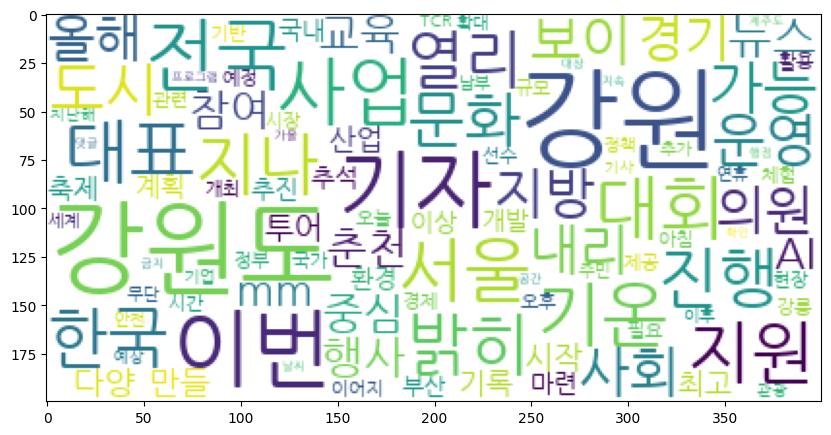

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

most_freq = counter.most_common(100) # get only most common 100 word
wc = WordCloud( # put for word cloud
    font_path="/Users/kyeongpil/Library/Fonts/NanumGothic.ttf",  # 여기에 한글 지원되는 폰트 (나눔고딕) 경로를 넣어주세요
    prefer_horizontal=1.0,
    background_color="white",
)
cloud = wc.generate_from_frequencies(dict(most_freq)) # make more freq word bigger

plt.figure(figsize=(10, 8))
plt.imshow(cloud)
plt.show()

In [ ]:
# 다음과 같이 고빈도 단어를 기준으로 단어 사전을 구축할 수 있습니다.
#make dict from freq word
vocab = [word for word, freq in counter.most_common() if freq >= 5]
print(f"단어 사전 크기: {len(vocab)}") # see dict size

#give index to vocab
word2idx = {word: idx for idx, word in enumerate(vocab)}

#get index for vocab knu
print(f"\"강원대학교\"라는 단어의 index: {word2idx.get('강원대학교', -1)}")

단어 사전 크기: 18330
"강원대학교"라는 단어의 index: 8533
